In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit 

## Part 1: Gain and Read Noise

In [29]:
#Importing taken bias, dark, and flat frames 
bias = []
for i in range(1,11):
    bias.append(fits.getdata("Bias-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))

In [30]:
dark = []
for i in range(1,11):
    dark.append(fits.getdata("Dark-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))

In [31]:
flat121 = []
for i in range(1,11):
    flat121.append(fits.getdata("Lamp121-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))

In [32]:
flat242 = []
for i in range(1,11):
    flat242.append(fits.getdata("Lamp242-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))

In [33]:
flat60 = []
for i in range(1,11):
    flat60.append(fits.getdata("Lamp60-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))

In [34]:
#gain calculations from the varience of the mean and the mean of the flats at all light levels

bias = np.asarray(bias)

biasmean=bias.mean(axis=0)

In [35]:
#mean and varience for flat at light level 121 through subtracting out the bias
flat121 = np.asarray(flat121)

FB121 = (flat121 - biasmean)

FB121.mean()

FB121var = FB121.var(axis=0)

FB121varmean = FB121var.mean()

In [36]:
#mean and varience for flat at light level 224 through subtracting out the bias
flat242 = np.asarray(flat242)

FB242 = (flat242 - biasmean)

FB242.mean()

FB242var = FB242.var(axis=0)

FB242varmean = FB242var.mean()

In [37]:
#mean and varience for flat at light level 224 through subtracting out the bias
flat60 = np.asarray(flat60)

FB60 = (flat60 - biasmean)

FB60.mean()

FB60var = FB60.var(axis=0)

FB60varmean = FB60var.mean()

In [56]:
#graphing variance versus mean, curve fitting a solution, and finding the slope as the gain from the curve fit 
def func (x,m,b):
    return m*x+b

m0,b0 = (0.5,0)
xvals = [FB121varmean,FB242varmean,FB60varmean]
yvals = [FB121.mean(),FB242.mean(),FB60.mean()]
coeffs, fiterr = curve_fit(func, xvals, yvals, p0=(m0,b0))

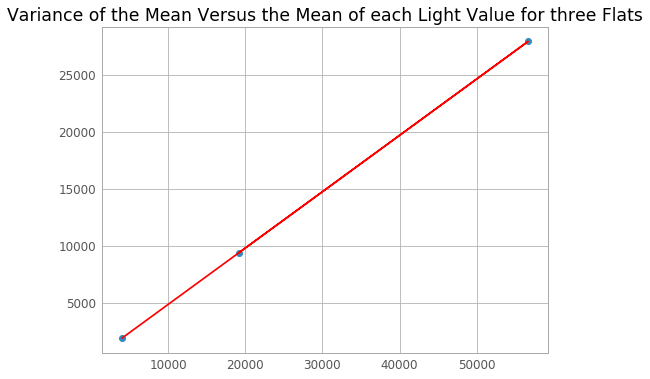

Gain Value= 0.49422443888088546


In [57]:
plt.scatter([FB121varmean,FB242varmean,FB60varmean],[FB121.mean(),FB242.mean(),FB60.mean()])
plt.plot(xvals,func(np.array(xvals),*coeffs), color='r')
plt.title('Variance of the Mean Versus the Mean of each Light Value for three Flats')
plt.show()

print('Gain Value=',coeffs[0])

gain = coeffs[0]

In [40]:
#finding read noise through the given relation, although the y intercept of the curve fit could work the error is large

re= (coeffs[0]*bias.std(axis=0).mean())

print('Read Noise=', re)

Read Noise= 9.605652930674532


# Part 2: Dark Current

In [68]:
#Importing observation session 2's bias and dark frames from groups at all temperatures taken
bias2 = []
for i in range(1,21):
    bias2.append(fits.getdata("Bias2-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))

In [69]:
CCDimage1 = fits.getdata("CCD Image 1.fit")
CCDimage2 = fits.getdata("CCD Image 2.fit")
CCDimage3 = fits.getdata("GroupBDarkT6exp300.fit")
CCDimage4 = fits.getdata("GroupBDarkT9exp600.fit")
CCDimage5 = fits.getdata("DarkT7.1Exp400.fit")
CCDimage6 = fits.getdata("DarkT9.4Exp300.fit")
CCDimage7 = fits.getdata("GroupDDarkT7Exp600.fit")
CCDimage8 = fits.getdata("GroupDDarkT9.4Exp300.fit")
CCDimage9 = fits.getdata("DarkT9exp600-0001.fit")


In [70]:
#finding the mean of the second observation's bias
bias2 = np.asarray(bias2)

bias2mean=bias2.mean(axis=0)

In [71]:
#Dark Current 1, 8.9C for 300s
darkcurrent1 = (CCDimage1 - bias2mean)
darkcurrent1medianrate = np.median(darkcurrent1)/300

#Dark Current 2, 4.6C for 450s
darkcurrent2 = (CCDimage2 - bias2mean)
darkcurrent2medianrate = np.median(darkcurrent2)/450

#Dark Current 3, 6C for 300s
darkcurrent3 = (CCDimage3 - bias2mean)
darkcurrent3medianrate = np.median(darkcurrent3)/300

#Dark Current 4, 9C for 600s
darkcurrent4 = (CCDimage4 - bias2mean)
darkcurrent4medianrate = np.median(darkcurrent4)/600

#Dark Current 5, 6C for 400s
darkcurrent5 = (CCDimage5 - bias2mean)
darkcurrent5medianrate = np.median(darkcurrent5)/400

#Dark Current 6, 9.4C for 300s
darkcurrent6 = (CCDimage6 - bias2mean)
darkcurrent6medianrate = np.median(darkcurrent6)/300

#Dark Current 7, 7C for 600s
darkcurrent7 = (CCDimage7 - bias2mean)
darkcurrent7medianrate = np.median(darkcurrent7)/600

#Dark Current 8, 9.4C for 300s
darkcurrent8 = (CCDimage8 - bias2mean)
darkcurrent8medianrate = np.median(darkcurrent8)/300

#Dark Current 9, 9C for 600s
darkcurrent9 = (CCDimage9 - bias2mean)
darkcurrent9medianrate = np.median(darkcurrent9)/600


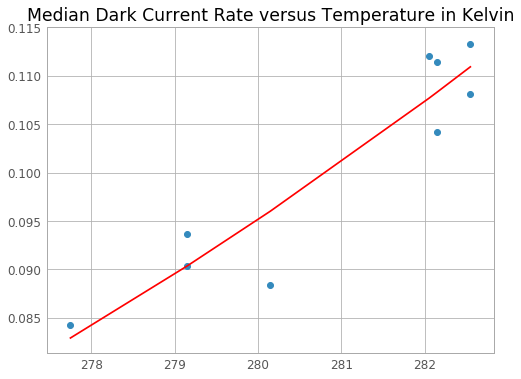

Calculated Band Gap (e) =  0.7470484669623725
Calculated a =  108.7707198049677
Band Gap of Silicon = 1.14


In [72]:
#plotting Dark Currents(y axis) vs Temperatures(x axis) through the given relation and finding band gap and other constant through the curve fit

def func2 (T,E,A):
    return A*T**(3/2)*np.exp(-E/(2*(8.61*10**(-5))*T))
E0,A0 = (0.5,130)
xvals2 = [277.75,279.15,279.15,280.15,282.05,282.15,282.15,282.55,282.55]
yvals2 = np.array([darkcurrent2medianrate,darkcurrent5medianrate,darkcurrent3medianrate,darkcurrent7medianrate,darkcurrent1medianrate,darkcurrent4medianrate,darkcurrent9medianrate,darkcurrent6medianrate,darkcurrent8medianrate])*gain
coeffs2, fiterr2 = curve_fit(func2, xvals2, yvals2, p0=(E0,A0))
plt.plot(xvals2,func2(np.array(xvals2),*coeffs2), color='r')

plt.scatter(xvals2,yvals2)
plt.title('Median Dark Current Rate versus Temperature in Kelvin')
plt.show()

print('Calculated Band Gap (e) = ', coeffs2[0])
print('Calculated a = ', coeffs2[1])
print('Band Gap of Silicon = 1.14')